## Multi Armed Bandits : Explore Exploit Dilemma

### a) Epsilon Greedy Algorithm

In [2]:
epsilon = 0.1 # probability of exploration

while True:
    r = np.random.random()
    if r < epsilon:
        # explore
        # random advertisement
    else:
        # exploit
        # show best advertisement (#clicks/#impressions)

IndentationError: expected an indented block (<ipython-input-2-8ebfc7ba5f9a>, line 8)

### b) UCB1 Algorithm

### c) Conjugate Priors

** Psuedocode **

```
while True:
    Draw a random sample from all the bandits' current Beta(aj, bj)
    j* = bandit that gives us the maximum sample
    x = Play bandit j*
    aj* = aj* + x   (If clicked)
    bj* = bj* + 1 - x (If not clicked)
```

## Bayesian Bandit : A/B Testing

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
%matplotlib inline

In [17]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75] # if probabilities less than this, it means a click

In [18]:
class Bandit:
    def __init__(self, p):
        ## Beta distributions with priors having a = 1, b = 1 as parameters 
        self.p = p # probability of winning for a bandit
        self.a = 1
        self.b = 1
    
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1 - x

In [20]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label="real p: {}".format(b.p))
    plt.title("Bandit distributions after {} trials".format(trial))
    plt.legend()
    plt.show()

In [25]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    for i in range(NUM_TRIALS):
        bestb = None # best bandit whose arm we eventually pull
        maxsample = -1
        allsamples = []
        for b in bandits:
            sample = b.sample()
            allsamples.append(sample)
            if sample > maxsample:
                maxsample = sample
                bestb = b
        if i in sample_points:
            print("current samples {}".format(allsamples))
            plot(bandits, i)    
        x = bestb.pull()
        bestb.update(x)

current samples [0.5484440264311284, 0.29379214972574086, 0.3917734066602121]


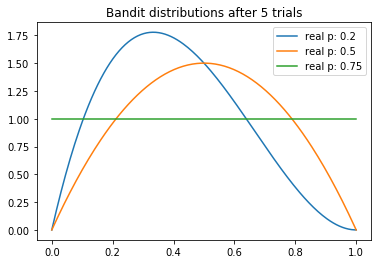

current samples [0.26470483102301406, 0.3135455670499673, 0.7609779544586353]


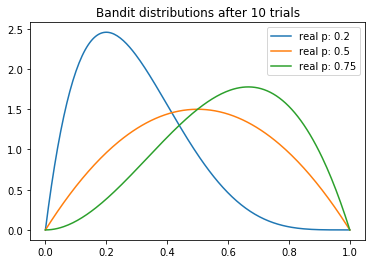

current samples [0.39452347527060977, 0.34220508813636674, 0.7767845274057769]


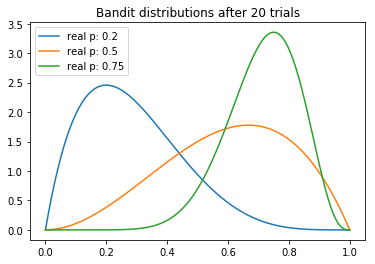

current samples [0.46290074856630786, 0.17322115514975236, 0.704251471732732]


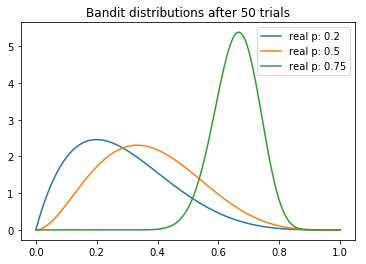

current samples [0.4331887763444702, 0.37116451909531945, 0.7500532276756096]


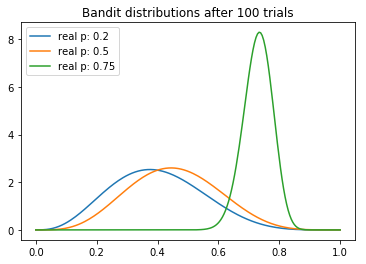

current samples [0.4082454568841162, 0.5809810127432383, 0.7304616699123522]


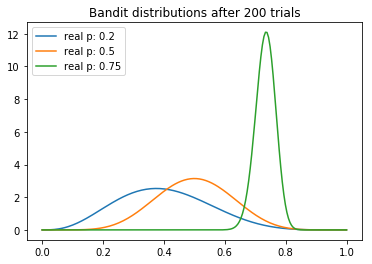

current samples [0.2602799916853153, 0.35414169901883275, 0.7520377205338682]


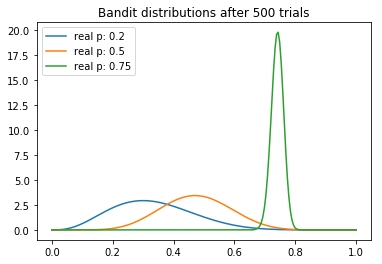

current samples [0.484365883663892, 0.5287889018209446, 0.728687438263779]


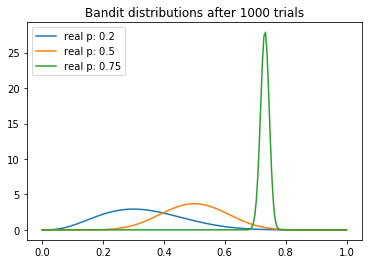

current samples [0.3484757026083911, 0.6622067163095914, 0.7317437394160844]


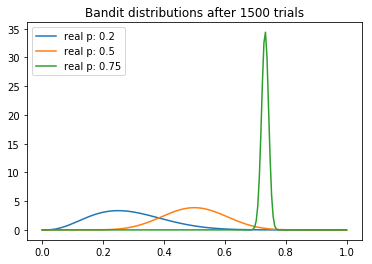

current samples [0.3430166576456758, 0.47584400978831903, 0.7079594794939804]


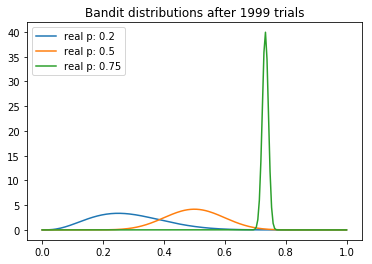

In [26]:
experiment()

### Thompson Sampling Convergence

In [28]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [35]:
def run_experiment(p1, p2, p3, N):
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        data[i] = x
        
    cumulative_average_ctr = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_average_ctr)
    plt.plot(np.ones(N) * p1)
    plt.plot(np.ones(N) * p2)
    plt.plot(np.ones(N) * p3)
    plt.ylim((0, 1))
    plt.xscale('log')
    plt.show()

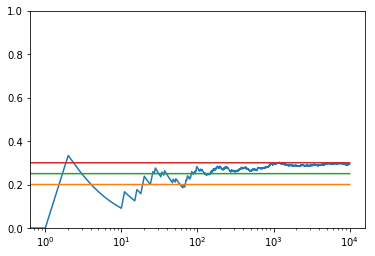

In [40]:
run_experiment(0.2, 0.25, 0.3, 10000)

## CI Comparison